# 복습

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import glob

In [4]:
img = cv2.imread("./fig1/puppy.bmp",0)

if img is None:
    print("image read failed")
    sys.exit()
    
cv2.namedWindow("image")

cv2.imshow("image", img)

while True:
    key = cv2.waitKey()
    if  key == 27 or key == ord("q"):
        break

cv2.destroyAllWindows()

In [5]:
img_files = glob.glob("./fig1/images/*.*")

cv2.namedWindow("scene", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("scene", cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_files[idx])
    
    if img is None:
        print("image read failed")
        break
        
    cv2.imshow("scene", img)
    
    if cv2.waitKey(2000) == 27:
        break
    
    idx += 1
    
    if idx >= len(img_files):
        idx = 0
cv2.destroyAllWindows()

In [7]:
dst = cv2.imread("fig/airplane.bmp")
mask = cv2.imread("fig/mask_plane.bmp",0) #grayscale
src = cv2.imread("fig/field.bmp")

mask_inv = -mask

cv2.copyTo(dst, mask_inv, src)

cv2.imshow("src",src)
cv2.imshow("mask",mask)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
img = np.full((800,1200,3),255, np.uint8)

cv2.line(img,(50,50),(400,100),(255,0,0),5,cv2.LINE_AA)
cv2.arrowedLine(img,(400,100),(400,300),(0,0,255),5,cv2.LINE_AA)
cv2.rectangle(img,(50,200),(200,400),(255,255,0),-1)
cv2.rectangle(img,(50,200,150,200),(255,255,0),10,cv2.LINE_AA)
text = "Hello OPencv!"

cv2.putText(img,text,(100,500),cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255),4,cv2.LINE_AA)

cv2.imshow("image", img)

cv2.waitKey()

cv2.destroyAllWindows()

In [12]:
cap = cv2.VideoCapture(0)

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.8)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter("review.avi", fourcc = fourcc, fps = fps, frameSize =(w,h))



while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Go home!")
        break
    
    
    edge = cv2.Canny(frame,50,150)
    out.write(frame)
    
    cv2.imshow("frame", frame)
    cv2.imshow("edge", edge)
    
    
    if cv2.waitKey(30) == 27:
        break

out.release()
cap.release()
cv2.destroyAllWindows()

In [14]:
def call_mouse(event,x,y,flags,param):
    
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx, oldy),(x,y),(255,0,255),4,cv2.LINE_AA)
            cv2.imshow("image", img)
            oldx, oldy = x, y
    



img = np.ones((600,1200,3), np.uint8)*255

cv2.imshow("image", img)
cv2.setMouseCallback("image", call_mouse, img)


cv2.waitKey()
cv2.destroyAllWindows()

# 본 수업

In [15]:
def call_trackbar(pos):
    img[:] = pos
    cv2.imshow("image",img)


img = np.zeros((480, 640), np.uint8)

cv2.namedWindow("image")


cv2.createTrackbar("level","image",0,255,call_trackbar)


cv2.imshow("image",img)

cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
def call_trackbar(pos):
    global img
    
    img_glass = img*pos
    cv2.imshow("image",img_glass)


img_alpha = cv2.imread("./fig/imgbin_sunglasses_1.png",cv2.IMREAD_UNCHANGED)
img = img_alpha[:,:,-1]
img[img>0] = 1

cv2.namedWindow("image")


cv2.createTrackbar("level","image",0,255,call_trackbar)


cv2.imshow("image",img)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
img = cv2.imread("./fig1/lenna.bmp")

if img is None:
    print("image read failed")
    sys.exit()
    
# dst = np.clip(img +100., 0 , 255).astype(np.uint8)
dst = cv2.add(img, (100,100,100,0))

cv2.imshow("image",img)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
import matplotlib.pylab as plt

In [31]:
src1 =cv2.imread("fig1/lenna256.bmp",0)
h,w = src1.shape[:2]
src2 = np.zeros((h,w), np.uint8)
cv2.circle(src2, (128,128),100,200,-1)
cv2.circle(src2, (128,128),50,50,-1)
cv2.circle(src2, (128,128),20,20,-1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, .5,src2,.5,0)
dst3 = cv2.subtract(src1,src2)
dst4 = cv2.absdiff(src1,src2)

cv2.imshow("src1",src1)
cv2.imshow("src2",src2)
cv2.imshow("dst1",dst1)
cv2.imshow("dst2",dst2)
cv2.imshow("dst3",dst3)
cv2.imshow("dst4",dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1, (10,10),(128,240),255,-1)

src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 50, 255, -1)

cv2.imshow("src1",src1)
cv2.imshow("src2",src2)

cv2.waitKey()
cv2.destroyAllWindows()

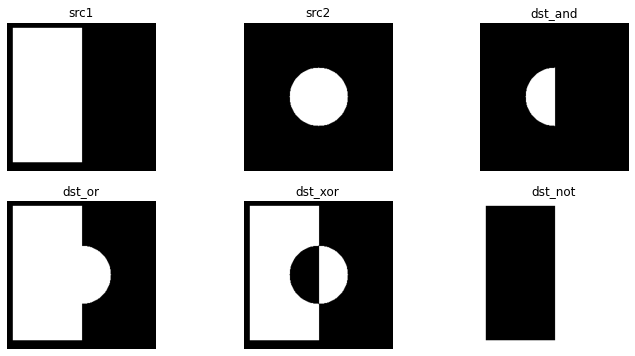

In [40]:
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1, (10,10),(128,240),255,-1)

src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 50, 255, -1)

dst_and = cv2.bitwise_and(src1,src2)
dst_or = cv2.bitwise_or(src1,src2)
dst_xor = cv2.bitwise_xor(src1,src2)
dst_not = cv2.bitwise_not(src1)

plt.figure(figsize=(12,6))

plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_and, cmap='gray'), plt.axis('off'), plt.title('dst_and')
plt.subplot(234), plt.imshow(dst_or, cmap='gray'), plt.axis('off'), plt.title('dst_or')
plt.subplot(235), plt.imshow(dst_xor, cmap='gray'), plt.axis('off'), plt.title('dst_xor')
plt.subplot(236), plt.imshow(dst_not, cmap='gray'), plt.axis('off'), plt.title('dst_not')

plt.show()

In [38]:
src = cv2.imread("./fig1/flowers.jpg")

b,g,r = cv2.split(src)
dst = cv2.merge([b,g,r])



cv2.imshow("src",src)
cv2.imshow("dst",dst)


cv2.imshow("b",b)
cv2.imshow("g",g)
cv2.imshow("r",r)


cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
src = cv2.imread("./fig1/flowers.jpg")

b,g,r = cv2.split(src)
dst = cv2.merge([b,g,r])

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

cv2.imshow("src",src)


cv2.imshow("h",h)
cv2.imshow("s",s)
cv2.imshow("v",v)


cv2.waitKey()
cv2.destroyAllWindows()